# Классификация sku (фарма)

Распознавание sku. Дан список sku, принятых у производителя. Необходимо разнести чеки - текстовое поле названия продукта в кассовых чеках - по приведенным sku (мультиклассификация). Обучение с учителем.

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('farma_sku.csv', decimal=",",dtype={'code': np.int,'quantity':np.float,'full_sum':np.float})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81378 entries, 0 to 81377
Data columns (total 5 columns):
product_name     81378 non-null object
sku_main_name    81378 non-null object
code             81378 non-null int32
quantity         81378 non-null float64
full_sum         81378 non-null float64
dtypes: float64(2), int32(1), object(2)
memory usage: 2.8+ MB


In [3]:
df.head()

,product_name,sku_main_name,code,quantity,full_sum
0,"Лозап плюс, тбл п/п/о 50мг +12.5мг №90 (15х6)",Lozap plus TBL.FLM.90,329,1.0,863.0
1,"Зодак, капли д/пр внутрь 10мг/мл 20мл",Zodac GTT.20ML,365,1.0,199.0
2,"Фестал, држ киш-раств №40",FESTAL DRAGEE 200MG #40,273,1.0,212.0
3,"Но-шпа форте, тбл 80мг №24",NO-SPA FORTE 80MG TAB BL1X24 M36 RU,505,1.0,120.0
4,"Фестал, држ киш-раств №40",FESTAL DRAGEE 200MG #40,273,1.0,212.0


In [4]:
pandas_profiling.ProfileReport(df)

Number of variables,5
Number of observations,81378
Total Missing (%),0.0%
Total size in memory,2.8 MiB
Average record size in memory,36.0 B
Numeric,3
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [5]:
np.unique(df['product_name'])

array(['Kлексан, р-р д/инъ 2000 анти-Ха МЕ/0.2мл №10 шприц',
       'Kлексан, р-р д/инъ 4000 анти-Ха МЕ/0.4мл №10 шприц',
       'Kлексан, р-р д/инъ 6000 анти-Ха МЕ/0.6мл №2 шприц',
       'Kоапровель, тбл п/п/о 150мг+12.5мг №28',
       'Kоапровель, тбл п/п/о 300мг+12.5мг №28',
       'Kоапровель, тбл п/п/о 300мг+25мг №28',
       'Kоплавикс, тбл п/п/о 100мг+75мг  №28',
       'Kоплавикс, тбл п/п/о 100мг+75мг №100',
       'АПРОВАСК ТАБЛ. П/О 10МГ+150МГ №28',
       'АПРОВАСК ТАБЛ. П/О 10МГ+300МГ №28',
       'АПРОВАСК ТАБЛ. П/О 5МГ+150МГ №28',
       'АПРОВАСК ТАБЛ. П/О 5МГ+300МГ №28', 'АПРОВЕЛЬ ТАБЛ. 150МГ №14',
       'АПРОВЕЛЬ ТАБЛ. 150МГ №28', 'АПРОВЕЛЬ ТАБЛ. 300МГ №28',
       'Апроваск, тбл п/п/о  5мг+150мг №28',
       'Апроваск, тбл п/п/о  5мг+300мг №28',
       'Апроваск, тбл п/п/о 10мг+150мг №28',
       'Апроваск, тбл п/п/о 10мг+300мг №28',
       'Апровель, тбл п/п/о 150мг №14', 'Апровель, тбл п/п/о 150мг №28',
       'Апровель, тбл п/п/о 300мг №28',
       'ГУТТАЛАКС КАП

In [6]:
np.unique(df['sku_main_name'])

array(['APROVASC TABS 150-10MG BLIST #28',
       'APROVASC TABS 150-5MG BLIST #28',
       'APROVASC TABS 300-10MG BLIST #28',
       'APROVASC TABS 300-5MG BLIST #28', 'APROVEL TABS 150MG BLIST #14',
       'APROVEL TABS 150MG BLIST #28', 'APROVEL TABS 300MG BLIST #28',
       'CLEXANE 2000IU/0,2ML SYR., #10', 'CLEXANE 4000IU/0,4ML SYR., #10',
       'CLEXANE 6000IU/0,6ML SYR., #2', 'CLEXANE 8000IU/0,8ML SYR., #10',
       'CO APROVEL TABS 150MG BLIST #28',
       'CO APROVEL TABS 300MG BLIST #28',
       'CO-APROVEL 300-25MG TABCO BL2X14 M24 RU',
       'Co-Plavix 75-100mg blist #100', 'Co-Plavix 75-100mg blist #28',
       'D-SUN LEMON 20ML DROP', 'D-SUN RASPBERRY 10ML DROP',
       'DEPAKINE CHRONO TABS 300MG #100',
       'DEPAKINE CHRONO TABS 500MG #30',
       'DEPAKINE ENTERIC 300 TABS 300MG #100',
       'DEPAKINE SYROP 5,7% 150ML #1',
       'Depakine Chronsphere 1000mg sachets #30',
       'Depakine Chronsphere 100mg sachets #30',
       'Depakine Chronsphere 250mg sachets 

In [7]:
df[df['quantity']<1].head()

,product_name,sku_main_name,code,quantity,full_sum
104,"Фестал, држ киш-раств №100",FESTAL DRAGEE 200MG #100,38,0.1,66.0
210,"Фестал, држ киш-раств №100",FESTAL DRAGEE 200MG #100,38,0.2,129.8
533,"Фестал, држ киш-раств №100",FESTAL DRAGEE 200MG #100,38,0.1,67.0
536,"Лозап плюс, тбл п/п/о 50мг +12.5мг №90 (15х6)",Lozap plus TBL.FLM.90,329,0.5,447.0
600,"Фестал, држ киш-раств №100",FESTAL DRAGEE 200MG #100,38,0.1,66.7


Не так много уникальных значений, попробуем решить задачу в лоб - обычным словарем

## Решение в лоб

In [8]:
class DictClassificator(BaseEstimator):
    def __init__(self):
        self.dictionary = {}
        
    def fit(self,X,y=None):
        self.dictionary = {x:y for x,y in zip(X,y)}
        return self
    
    def predict(self, X):
        y = np.array([self.dictionary[x] for x in X])
        return y
    
    def predict_proba(self, X):
        return np.array([[self.dictionary[x],1.0] for x in X])
    

In [9]:
X = df['product_name']
y = df['code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
dc = DictClassificator()
dc.fit(X,y) # могут попасть не все классы и придется обрабатывать KeyError
accuracy_score(dc.predict(X_test),y_test)

1.0

Посмотрим на словарь

In [10]:
r_dict={}
for key,value in dc.dictionary.items():
    vl = df[df['code']==value]['sku_main_name'].iloc[0]
#     vl = value
    try:
        r_dict[vl].append(key)
    except KeyError:
        r_dict[vl]=[key]
        
r_dict

{'Lozap plus TBL.FLM.90': ['Лозап плюс, тбл п/п/о 50мг +12.5мг №90 (15х6)',
  'ЛОЗАП ПЛЮС ТАБЛ. П/О 50МГ/12,5МГ №90'],
 'Zodac GTT.20ML': ['Зодак, капли д/пр внутрь 10мг/мл 20мл',
  'ЗОДАК КАПЛИ ОРАЛ. 10МГ/МЛ 20МЛ'],
 'FESTAL DRAGEE 200MG #40': ['Фестал, држ киш-раств  №40', 'ФЕСТАЛ ДРАЖЕ №40'],
 'NO-SPA FORTE 80MG TAB BL1X24 M36 RU': ['Но-шпа форте, тбл 80мг №24',
  'НО-ШПА ФОРТЕ ТАБЛ. 80МГ №24'],
 'MAGNE B6 AMP 100MG/ 10MG/ 10ML #10': ['Магне B6, р-р д/пр внутрь 10мл №10 амп',
  'МАГНЕ В6 Р-Р Д/ПРИЕМА ВНУТРЬ АМП. №10'],
 'Lozap plus TBL.FLM.30': ['Лозап плюс, тбл п/п/о 50мг +12.5мг №30',
  'Лозап плюс, тбл п/п/о 50мг +12.5мг  №30',
  'ЛОЗАП ПЛЮС ТАБЛ. П/О 50МГ/12,5МГ №30'],
 'NO-SPA 40mg #24': ['Но-шпа, тбл 40мг  №24', 'НО-ШПА ТАБЛ. 40МГ №24'],
 'Lozap TBL.FLM.30X50MG': ['Лозап, тбл п/п/о  50мг №30',
  'ЛОЗАП ТАБЛ. П/О 50МГ №30',
  'Лозап, тбл п/п/о  50мг  №30'],
 'MAALOX TABS 400MG #20': ['Маалокс, тбл жев №20', 'МААЛОКС ТАБЛ. ЖЕВ. №20'],
 'LOZAP 50MG TABCO BL6X10 RU': ['Лозап, тбл 

Получилось идеально))) Есть несколько но:
 * Может появится не учтенное сокращение и будут проблемы (модель не знает что с этим делать вообще)
 * Интересно проанализировать модель)))

## Анализ фичей

Заголовки в чеке содержат:

* торговое название препарата
* тип таблетки/капли/суспензии/раствор/ампулы и пр
* дозировку
* объем/количество таблеток

при этом, название препарата идет на первой позиции, остальные могут меняться местами
Хоть в качестве фичей могут использоваться цены - не самая лучшая фича, т.к.:

* могут быть акции и цена меняется
* цена вообще может меняться со временем

Поэтому для начала лучше обойтись без неё

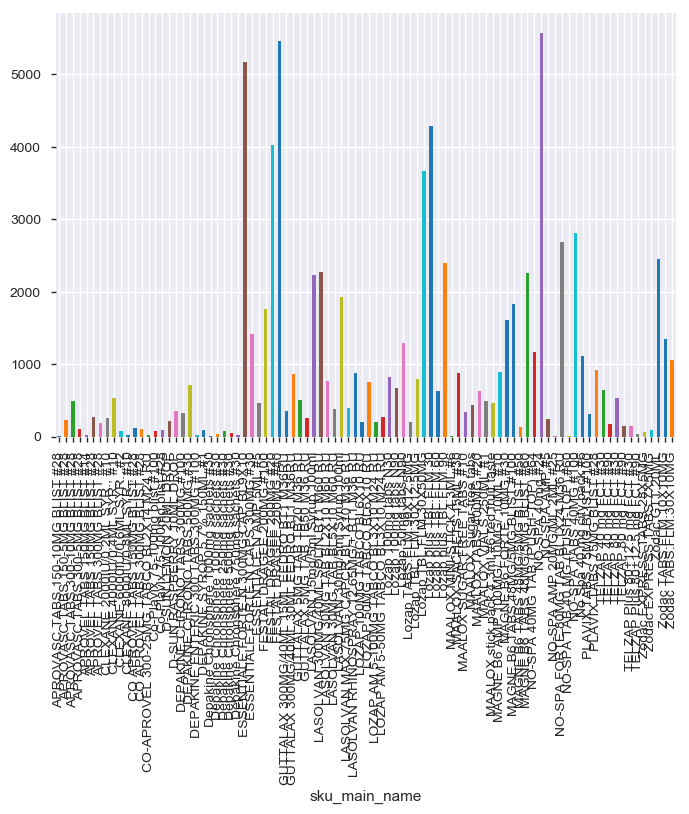

In [11]:
df.groupby(['sku_main_name'])['code'].count().plot.bar()

Как видно, классы не сбалансированы, пока не будем ничего с этим делать

Выведем малочисленные классы и исходные фичи

In [12]:
df.groupby(['sku_main_name']).filter(lambda x: x['code'].count() < 20).groupby(['sku_main_name'])['code'].count()

sku_main_name
APROVASC TABS 150-10MG BLIST #28           13
CLEXANE 8000IU/0,8ML SYR., #10             17
CO-APROVEL 300-25MG TABCO BL2X14 M24 RU    18
DEPAKINE ENTERIC 300 TABS 300MG #100       17
Depakine Chronsphere 1000mg sachets #30     6
Depakine Chronsphere 750mg sachets #30     16
MAALOX MINI-STICK 4,3ML #6                  4
NO-SPA AMP 20MG/ML 2ML #25                 15
NO-SPA TAB 40 MG (PUSH-TOP) #60             4
Name: code, dtype: int64

In [13]:
df.groupby(['sku_main_name']).filter(lambda x: x['code'].count() < 20).groupby(['product_name'])['code'].count()

product_name
Kоапровель, тбл п/п/о 300мг+25мг №28                        7
АПРОВАСК ТАБЛ. П/О 10МГ+150МГ №28                          11
Апроваск, тбл п/п/о 10мг+150мг №28                          2
ДЕПАКИН ХРОНОСФЕРА ГРАН. ПАКЕТЫ 1000МГ №30                  1
ДЕПАКИН ХРОНОСФЕРА ГРАН. ПАКЕТЫ 750МГ №30                   2
ДЕПАКИН ЭНТЕРИК ТАБЛ. П/О 300МГ №100                        1
Депакин Хроносфера, гран пролонг д/пр внутрь  750мг №30    14
Депакин Хроносфера, гран пролонг д/пр внутрь 1000мг №30     5
Депакин энтерик 300, тбл п/о киш-раств 300мг №100          16
КЛЕКСАН Р-Р Д/ИН. ШПРИЦ 80МГ/0,8МЛ №10                      5
КЛЕКСАН Р-Р Д/ИН. ШПРИЦ 8ТЫС. АНТИ-XA МЕ/0.8 МЛ №10        10
КОАПРОВЕЛЬ ТАБЛ. 300МГ/25МГ №28                             3
Клексан, р-р д/инъ 8000 анти-Ха МЕ/0.8мл №10 шприц          2
Коапровель, тбл п/п/о 300мг+25мг №28                        8
МААЛОКС МИНИ СУСП. ПАКЕТИКИ 4,3МЛ №6                        2
Маалокс-мини, сусп д/пр внутрь 4.3мл  №6                 

In [14]:
df.groupby(['product_name']).filter(lambda x: x['code'].count() < 5).groupby(['product_name'])['code'].count()

product_name
Kлексан, р-р д/инъ 6000 анти-Ха МЕ/0.6мл №2 шприц     3
АПРОВАСК ТАБЛ. П/О 5МГ+300МГ №28                      3
Апроваск, тбл п/п/о 10мг+150мг №28                    2
ДЕПАКИН ХРОНОСФЕРА ГРАН. ПАКЕТЫ 1000МГ №30            1
ДЕПАКИН ХРОНОСФЕРА ГРАН. ПАКЕТЫ 750МГ №30             2
ДЕПАКИН ЭНТЕРИК ТАБЛ. П/О 300МГ №100                  1
КЛЕКСАН Р-Р Д/ИН 4000 АНТИ-ХА МЕ 0,4МЛ N10 ШПРИЦЫ     1
КОАПРОВЕЛЬ ТАБЛ. 300МГ/25МГ №28                       3
Клексан, р-р д/инъ 8000 анти-Ха МЕ/0.8мл №10 шприц    2
ЛОЗАП ТАБ. П/ПЛ. ОБ. 12,5МГ №30                       1
ЛОЗАП ТАБЛ. П/ПЛЕН/ОБ. 50МГ №90                       1
Лозап плюс, тбл п/п/о 50мг +12.5мг  №60               2
Лозап, тбл п/п/о  12.5мг  №30                         2
Лозап, тбл п/п/о  50мг  №60                           2
МААЛОКС МИНИ СУСП. ПАКЕТИКИ 4,3МЛ №6                  2
Маалокс-мини, сусп д/пр внутрь 4.3мл  №6              2
НО-ШПА ТАБЛ. ФЛ. С ДОЗАТОРОМ 40МГ №60                 2
Но-шпа, тбл 40мг  №60 фл-доз       

Для начала попробуем применить в лоб BOW

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['product_name']).toarray()
vectorizer.get_feature_names()
# X.toarray()[0]

['10',
 '100',
 '1000мг',
 '100мг',
 '100мл',
 '10мг',
 '10мл',
 '118',
 '12',
 '14',
 '150мг',
 '150мл',
 '15мг',
 '15мл',
 '15х6',
 '20',
 '2000',
 '20мг',
 '20мл',
 '24',
 '25',
 '250мг',
 '250мл',
 '25мг',
 '28',
 '2мл',
 '30',
 '300',
 '300мг',
 '30мг',
 '30мл',
 '3мл',
 '40',
 '4000',
 '40мг',
 '4мл',
 '50',
 '500мг',
 '50мг',
 '57',
 '5мг',
 '5мл',
 '60',
 '6000',
 '60мг',
 '64',
 '64мг',
 '6мл',
 '750мг',
 '75мг',
 '80',
 '8000',
 '80мг',
 '82мкг',
 '8мл',
 '8тыс',
 '90',
 'b6',
 'kлексан',
 'kоапровель',
 'kоплавикс',
 'n10',
 'xa',
 'акция',
 'ам',
 'амп',
 'анти',
 'апроваск',
 'апровель',
 'в6',
 'внутр',
 'внутрь',
 'гран',
 'гутталакс',
 'депакин',
 'детский',
 'доз',
 'доза',
 'дозатором',
 'дозир',
 'драже',
 'држ',
 'жев',
 'зодак',
 'ин',
 'инг',
 'ингал',
 'инъ',
 'капли',
 'капс',
 'киш',
 'клексан',
 'коапровель',
 'коплавикс',
 'лазолван',
 'лесная',
 'лозап',
 'маалокс',
 'магне',
 'макс',
 'малина',
 'мг',
 'ме',
 'мини',
 'мл',
 'наз',
 'но',
 'об',
 'опролонг'

Разобьем на тестовую и тренировочно-валидационные выборки

In [16]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y)

И применим простые модели

In [17]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV, cross_val_score
from scipy.stats import randint,expon
from time import time
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split
import pickle

def report(search_res):
    print("Best param: {0}".format(search_res.best_params_))
    print("Best score: {0}".format(search_res.best_score_))

def test_model(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    model.fit(X_train, y_train)
    print("score:",accuracy_score(model.predict(X_test), y_test))

def gs_model(model,param,X,y,n_iter_search = 20, cv=5, jobs=4, verbose=10):
    search = RandomizedSearchCV(model, param_distributions=param, scoring="accuracy",
                                   n_iter=n_iter_search, cv=cv, n_jobs=jobs, verbose=verbose, pre_dispatch=4)
    start=time()
    search.fit(X, y)
    print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time() - start), n_iter_search))
    return search

def cv_model(model,X,y,jobs=4):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy',n_jobs=jobs)
    return scores
    
def model_sl(model_cls, param, X_train_val, y_train_val, X_test, y_test, model_name):
    try:
        with open(model_name+'_search.pkl', 'rb') as f:
            search = pickle.load(f)
    except FileNotFoundError:
        search = gs_model(model_cls(), param,X_train_val, y_train_val)
        with open(model_name+'_search.pkl', 'wb') as f:
            pickle.dump(search,f)
    report(search)
    print(search.best_estimator_)
    model = search.best_estimator_
    try:
        with open(model_name+'_scores.pkl', 'rb') as f:
            scores = pickle.load(f)
    except FileNotFoundError:
        scores = cv_model(model,X_train_val,y_train_val)
        with open(model_name+'_scores.pkl', 'wb') as f:
            pickle.dump(scores,f)
    print(scores)
    print(scores.mean(),scores.std())
    try:
        with open(model_name+'.pkl', 'rb') as f:
            model = pickle.load(f)
    except FileNotFoundError:
        model.fit(X_train_val,y_train_val)
        with open(model_name+'.pkl', 'wb') as f:
            pickle.dump(model,f)
    print("score:",accuracy_score(model.predict(X_test), y_test))
    
def load_model(model_name):
    with open(model_name+'.pkl', 'rb') as f:
        model = pickle.load(f)
    return model

In [18]:
from sklearn.linear_model import RidgeClassifier

param = {"alpha":[0.001,0.1,1,2,3,5,10,100,1000]}
model_sl(RidgeClassifier, param, X_train_val, y_train_val, X_test, y_test, 'lin_cls_v1')


Best param: {'alpha': 0.001}
Best score: 0.9550079465207347
RidgeClassifier(alpha=0.001, class_weight=None, copy_X=True,
        fit_intercept=True, max_iter=None, normalize=False,
        random_state=None, solver='auto', tol=0.001)
[0.95393286 0.9549358  0.95560652 0.95584373 0.95472473]
0.9550087279258754 0.0006779450293701367
score: 0.9553698697468666


In [19]:
from sklearn.linear_model import LogisticRegression

param = {"C":[0.001,0.1,1,2,3,5,10,100,1000]}
model_sl(LogisticRegression, param, X_train_val, y_train_val, X_test, y_test, 'log_reg_v1')

Best param: {'C': 10}
Best score: 0.9999344616846624
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
[0.99983664 0.99983643 1.         1.         1.        ]
0.9999346137848771 8.008146016282658e-05
score: 1.0


In [20]:
from sklearn.tree import DecisionTreeClassifier

param = {"max_depth":[None,2,5,10,15],
        "min_samples_split":[2,5,10,20,50,100]}
model_sl(DecisionTreeClassifier, param, X_train_val, y_train_val, X_test, y_test, 'tree_cls_v1')

Best param: {'min_samples_split': 5, 'max_depth': None}
Best score: 1.0
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[0.99991832 1.         1.         1.         1.        ]
0.9999836641346075 3.2671730784938896e-05
score: 1.0


Модели отработали идеально, особенно решающее дерево. Вероятно, ошибки связаны с несбалансированостью выборок, и нужный класс просто не попал. В данной задаче на этом можно остановится, но для исследования пойдем дальше.

## Feature engineering

Попробуем извлечь названия препаратов, их типы (таблетки, шприцы и пр.) и дозировки

In [21]:
df['product_name_lc'] = df['product_name'].str.strip().str.lower().str.replace(',', '')
df['product_name_lc']

0         лозап плюс тбл п/п/о 50мг +12.5мг №90 (15х6)
1                 зодак капли д/пр внутрь 10мг/мл 20мл
2                            фестал држ киш-раств  №40
3                            но-шпа форте тбл 80мг №24
4                            фестал држ киш-раств  №40
5                магне b6 р-р д/пр внутрь 10мл №10 амп
6                лозап плюс тбл п/п/о 50мг +12.5мг №30
7                                 но-шпа тбл 40мг  №24
8         лозап плюс тбл п/п/о 50мг +12.5мг №90 (15х6)
9                лозап плюс тбл п/п/о 50мг +12.5мг №30
10                           лозап тбл п/п/о  50мг №30
11                           лозап тбл п/п/о  50мг №30
12               лозап плюс тбл п/п/о 50мг +12.5мг №30
13                                 маалокс тбл жев №20
14                           лозап тбл п/п/о  50мг №60
15                  эссенциале форте h капс 300мг  №90
16                                но-шпа тбл 40мг   №6
17        лозап плюс тбл п/п/о 50мг +12.5мг №90 (15х6)
18        

In [22]:
def get_features(df):
    reg_tab = r'(?P<Name>.*) (?P<Type>капс|тбл|таб|табл|р-р|сусп|гран).* (?P<Dose>[\d\.]+)(?:мг|мл).*[n№](?P<Count>\d+).*'
    reg_cap = r'(?P<Name>.*) (?P<Type>капли|спрей|сироп|р-р).* (?P<Dose>[\d\.]+)(?:мкг/доза|%|мг/.*мл).* (?P<Count>\d+)мл.*'
    reg_dr = r'(?P<Name>.*) (?P<Type>тбл|таб|табл|држ|драже|р-р).*[n№](?P<Count>\d+).*'
    reg_cap2 = r'(?P<Name>.*) (?:.*|фл.\()(?P<Type>капли|сусп|сироп).* (?P<Count>\d+)мл.*'
    reg_sus = r'(?P<Name>.*) (?P<Count>\d+)мл.* (?P<Type>сусп).*'

    s = df['product_name_lc'].str.extract(reg_tab, expand=True)

    s_tmp = df['product_name_lc'].str.extract(reg_cap, expand=True)
    s['Name'] = s['Name'].fillna(s_tmp['Name'])
    s['Type'] = s['Type'].fillna(s_tmp['Type'])
    s['Count'] = s['Count'].fillna(s_tmp['Count'])
    s['Dose'] = s['Dose'].fillna(s_tmp['Dose'])

    s_tmp = df['product_name_lc'].str.extract(reg_dr, expand=True)
    s['Name'] = s['Name'].fillna(s_tmp['Name'])
    s['Type'] = s['Type'].fillna(s_tmp['Type'])
    s['Count'] = s['Count'].fillna(s_tmp['Count'])

    s_tmp = df['product_name_lc'].str.extract(reg_cap2, expand=True)
    s['Name'] = s['Name'].fillna(s_tmp['Name'])
    s['Type'] = s['Type'].fillna(s_tmp['Type'])
    s['Count'] = s['Count'].fillna(s_tmp['Count'])

    s_tmp = df['product_name_lc'].str.extract(reg_sus, expand=True)
    s['Name'] = s['Name'].fillna(s_tmp['Name'])
    s['Type'] = s['Type'].fillna(s_tmp['Type'])
    s['Count'] = s['Count'].fillna(s_tmp['Count'])

    s['Dose'] = s['Dose'].fillna(0)

    s = s.astype({'Count':float,'Dose':float})
    s['Type'] = s['Type'].str.replace(r'тбл|табл', 'таб').str.replace(r'држ|драже', 'драже')
    return s

In [23]:
s = get_features(df)
df = df.join(s)

In [24]:
pandas_profiling.ProfileReport(df)

Number of variables,10
Number of observations,81378
Total Missing (%),0.0%
Total size in memory,5.9 MiB
Average record size in memory,76.0 B
Numeric,5
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Создадим класс по извлечению фичей

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class Get_xy():
    def __init__(self):
        self.le_type = LabelEncoder()
        self.le_name = LabelEncoder()
        self.ohe_type = OneHotEncoder(handle_unknown='ignore')
        self.ohe_name = OneHotEncoder(handle_unknown='ignore')
    
    def fit(self, df):
        types = self.le_type.fit_transform(df['Type'])
        names = self.le_name.fit_transform(df['Name'])
        self.ohe_type.fit(types.reshape(-1,1))
        self.ohe_name.fit(names.reshape(-1,1))
    
    def transform(self,df):
        types = self.le_type.transform(df['Type'])
        names = self.le_name.transform(df['Name'])
        X = self.ohe_type.transform(types.reshape(-1,1))
        X = sparse.hstack([X, self.ohe_name.transform(names.reshape(-1,1))])
        X = np.concatenate([df[['Dose','Count']].values,X.todense()],axis=1)
        y = df['code']
        return X,y
    
    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)
    

## Тестируем модели

In [26]:
# отложим часть данных
l = int(df.shape[0]/2)
df_train = df[:l]
df_test = df[l:]

get_xy =Get_xy()
X_train_val,y_train_val = get_xy.fit_transform(df_train)
# если следущая строка выполняется без ошибок, значит туда попали все классы
X_test,y_test = get_xy.transform(df_test)

In [27]:
param = {"C":[0.001,0.1,1,2,3,5,10,100,1000]}
model_sl(LogisticRegression, param, X_train_val, y_train_val, X_test, y_test, 'log_reg_v2')

C:\ProgramData\Anaconda3\envs\DS 3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 9 is smaller than n_iter=20. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\ProgramData\Anaconda3\envs\DS 3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   13.2s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:   13.7s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:   47.5s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  21 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done  37 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:  5.6min finished
C:\ProgramData\Anaconda3\envs\DS 3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\DS 3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


RandomizedSearchCV took 356.20 seconds for 20 candidates parameter settings.
Best param: {'C': 1000}
Best score: 0.9612917496129175
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\ProgramData\Anaconda3\envs\DS 3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0.96071953 0.96101986 0.96130221 0.96170894 0.96171422]
0.9612929506079502 0.00038832625480842776


C:\ProgramData\Anaconda3\envs\DS 3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\envs\DS 3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


score: 0.9627663496276635


In [28]:
param = {"max_depth":[None,2,5,10,15],
        "min_samples_split":[2,5,10,20,50,100]}
model_sl(DecisionTreeClassifier, param, X_train_val, y_train_val, X_test, y_test, 'tree_cls_v2')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\ProgramData\Anaconda3\envs\DS 3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done  21 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done  37 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done  46 tasks      | elapsed:    4.2s
[Parallel(n_jobs=4)]: Done  57 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    6.0s
[Parallel(n_jobs=4)]: Done 

RandomizedSearchCV took 8.99 seconds for 20 candidates parameter settings.
Best param: {'min_samples_split': 20, 'max_depth': None}
Best score: 0.9906362899063629
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[0.99094469 0.99031625 0.99078624 0.99051958 0.99061381]
0.990636113598938 0.00021640041584859447
score: 0.9904888299048883


Это решение работает несколько хуже базового.

## Тест на 0 группу

In [29]:
df_g0 = pd.read_csv('train_with_0_group.csv', sep='\t')#,dtype={'code': np.int,'quantity':np.float,'full_sum':np.float})
df_g0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58629 entries, 0 to 58628
Data columns (total 3 columns):
Dss_SKU_ID       58629 non-null int64
SKU_Main_Name    58629 non-null object
new_name         58629 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [30]:
df_g0.head(25)

,Dss_SKU_ID,SKU_Main_Name,new_name
0,8,APROVEL TABS 150MG BLIST #14,Апровель таб. 150мг №14
1,8,APROVEL TABS 150MG BLIST #14,Апровель 150 мг №14
2,8,APROVEL TABS 150MG BLIST #14,АПРОВЕЛЬ 150МГ. №14 ТАБ.
3,8,APROVEL TABS 150MG BLIST #14,!АПРОВЕЛЬ ТАБ П_О 150МГ №14 (2987)
4,8,APROVEL TABS 150MG BLIST #14,(43188) Апровель таб.150мг №14
5,8,APROVEL TABS 150MG BLIST #14,Апровель таб. п.п.о. 150мг №14 (Санофи Клир Эс...
6,8,APROVEL TABS 150MG BLIST #14,1430008Апровель таб. 150мг №14 (Санофи Винтроп...
7,8,APROVEL TABS 150MG BLIST #14,1430008Апровель таб. п.п.о. 150мг №14 (Санофи ...
8,8,APROVEL TABS 150MG BLIST #14,212389 APROVEL TABS 150MG BLIST #14
9,8,APROVEL TABS 150MG BLIST #14,212389 Апровель таб. п/о плён. 150 мг №14


In [31]:
df_g0.tail(25)

,Dss_SKU_ID,SKU_Main_Name,new_name
58604,0,OTHER,"Папаверина г/хл буфус, р-р д/инъ 2% 2мл №10~Об..."
58605,0,OTHER,РАСТВОР Д/ЛИНЗ Д/ЧУВСТВ.ГЛАЗ 360МЛ РЕНЮ MPС
58606,0,OTHER,ИМУДОН ТАБЛ. Д/РАССАС. №8
58607,0,OTHER,РЕМАНТАДИН 50МГ N20 ТАБ.
58608,0,OTHER,ДОКТОР МОМ СИРОП 150 МЛ
58609,0,OTHER,Мяты перечной настойка
58610,0,OTHER,ФРУКТОВЫЙ ПОЦЕЛУЙ помада Набор N1 (№36)
58611,0,OTHER,"Толокнянки листья пак.-фильтр 1,5г №20"
58612,0,OTHER,Пимафуцин табл п о кишечн 100 мг
58613,0,OTHER,Кардиомагнил таб 75мг х 30


In [32]:
X = df_g0['new_name']
y = df_g0['Dss_SKU_ID']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
dc = DictClassificator()
dc.fit(X,y) # могут попасть не все классы и придется обрабатывать KeyError
accuracy_score(dc.predict(X_test),y_test)

0.9997157314230485

In [33]:
len(dc.dictionary)

58467

In [34]:
r_dict={}
for key,value in dc.dictionary.items():
    vl = df_g0[df_g0['Dss_SKU_ID']==value]['SKU_Main_Name'].iloc[0]
#     vl = value
    try:
        r_dict[vl].append(key)
    except KeyError:
        r_dict[vl]=[key]
        
r_dict

{'APROVEL TABS 150MG BLIST #14': ['       Апровель таб. 150мг №14 ',
  ' Апровель 150 мг №14',
  ' АПРОВЕЛЬ 150МГ. №14 ТАБ.',
  '!АПРОВЕЛЬ ТАБ П_О 150МГ №14 (2987)',
  '(43188) Апровель таб.150мг №14',
  'Апровель таб. п.п.о. 150мг №14 (Санофи Клир ЭсЭнСи/пр.Санофи Винтроп Индустрия)',
  '1430008Апровель таб. 150мг №14 (Санофи Винтроп Индустрия)',
  '1430008Апровель таб. п.п.о. 150мг №14 (Санофи Винтроп Индустрия)',
  '212389 APROVEL TABS 150MG BLIST #14',
  '212389 Апровель таб. п/о плён. 150 мг №14',
  '212389.00 Апровель таб. п/о плён. 150 мг №14',
  '5816Апровель таб. 150мг №14 (Sanofi)',
  '8 Апровель таб. п/п/о 150мг №14',
  'APROVEL 150MG TAB BL1X14 RU',
  'APROVEL TABS 150MG BLIST #14',
  'APROVEL TABS 150MG BLIST #14 212389',
  'APROVEL TABS 150MG BLIST #14 8',
  'APROVEL TAB 150MG BL1X14 RU',
  'Aprovel tab. 150 mg 14 (blisters)',
  'F.Апровель 150мг Таб. п/пл/об. Х14',
  'FV.Апровель 150мг Таб. Х14',
  'FV.Апровель 150мг Таб. Х14 (R) (Sanofi(Франция))',
  'FV.Апровель 150мг 

Как видно, данные координально отличаются от train. Они сильно зашумлены, структура несколько изменена + присутствуют английские названия, коих изначально не было

In [35]:
len(r_dict.keys())

95

In [36]:
vectorizer = CountVectorizer()
X = vectorizer.fit(df['product_name']).transform(df_g0['new_name'])
vectorizer.get_feature_names()

['10',
 '100',
 '1000мг',
 '100мг',
 '100мл',
 '10мг',
 '10мл',
 '118',
 '12',
 '14',
 '150мг',
 '150мл',
 '15мг',
 '15мл',
 '15х6',
 '20',
 '2000',
 '20мг',
 '20мл',
 '24',
 '25',
 '250мг',
 '250мл',
 '25мг',
 '28',
 '2мл',
 '30',
 '300',
 '300мг',
 '30мг',
 '30мл',
 '3мл',
 '40',
 '4000',
 '40мг',
 '4мл',
 '50',
 '500мг',
 '50мг',
 '57',
 '5мг',
 '5мл',
 '60',
 '6000',
 '60мг',
 '64',
 '64мг',
 '6мл',
 '750мг',
 '75мг',
 '80',
 '8000',
 '80мг',
 '82мкг',
 '8мл',
 '8тыс',
 '90',
 'b6',
 'kлексан',
 'kоапровель',
 'kоплавикс',
 'n10',
 'xa',
 'акция',
 'ам',
 'амп',
 'анти',
 'апроваск',
 'апровель',
 'в6',
 'внутр',
 'внутрь',
 'гран',
 'гутталакс',
 'депакин',
 'детский',
 'доз',
 'доза',
 'дозатором',
 'дозир',
 'драже',
 'држ',
 'жев',
 'зодак',
 'ин',
 'инг',
 'ингал',
 'инъ',
 'капли',
 'капс',
 'киш',
 'клексан',
 'коапровель',
 'коплавикс',
 'лазолван',
 'лесная',
 'лозап',
 'маалокс',
 'магне',
 'макс',
 'малина',
 'мг',
 'ме',
 'мини',
 'мл',
 'наз',
 'но',
 'об',
 'опролонг'

In [37]:
model = load_model('tree_cls_v1')
print("score:",accuracy_score(model.predict(X), y))

score: 0.3249586382165822


In [38]:
df_g0['product_name_lc'] = df_g0['new_name'].str.strip().str.lower().str.replace(',', '')
s = get_features(df_g0)
df_g0_f = df_g0.join(s)

In [39]:
pandas_profiling.ProfileReport(df_g0_f)

Number of variables,8
Number of observations,58629
Total Missing (%),22.9%
Total size in memory,3.6 MiB
Average record size in memory,64.0 B
Numeric,3
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [40]:
df_g0_f['code'] = df_g0_f['Dss_SKU_ID']
print(df_g0_f.shape)
df_g0_fg = df_g0_f.dropna()
print(df_g0_fg.shape)


(58629, 9)
(22794, 9)


In [41]:
cls = get_xy.le_type.classes_.tolist()
[cls.append(n) for n in df_g0_fg['Type'] if n not in cls]
get_xy.le_type.classes_ = np.array(cls)

cls = get_xy.le_name.classes_.tolist()
[cls.append(n) for n in df_g0_fg['Name'] if n not in cls]
get_xy.le_name.classes_ = np.array(cls)

X,y = get_xy.transform(df_g0_fg)

In [42]:
model = load_model('tree_cls_v2')
print("score:",accuracy_score(model.predict(X), y))

score: 0.43344739843818547


что в пересчете на все 22794*0,433/58629 = 0,168

попробуем немного почистить данные

In [73]:
def get_features2(df):
    reg_tab = r'(?P<Name>.*) (?P<Type>капс|тбл|таб|табл|р-р|сусп|гран).* (?P<Dose>[\d\.]+)(?:мг|мл).*[n№xх.]+(?P<Count>\d+).*'
    reg_cap = r'(?P<Name>.*) (?P<Type>капли|спрей|сироп|р-р).* (?P<Dose>[\d\.]+)(?:мкг/доза|%|мг/.*мл).* (?P<Count>\d+)мл.*'
    reg_dr = r'(?P<Name>.*) (?P<Type>тбл|таб|табл|држ|драже|р-р).*[n№xх.]+(?P<Count>\d+).*'
    reg_cap2 = r'(?P<Name>.*) (?:.*|фл.\()(?P<Type>капли|сусп|сироп).* (?P<Count>\d+)мл.*'
    reg_sus = r'(?P<Name>.*) (?P<Count>\d+)мл.* (?P<Type>сусп).*'
    reg_dr_wo_type = r'(?P<Name>.*) (?P<Dose>[\d\.]+).*(?:мкг/доза|%|мг/.*мл|мг|мг\.).*[n№xх.]+(?P<Count>\d+).*'

    s = df['product_name_lc'].str.extract(reg_tab, expand=True)

    s_tmp = df['product_name_lc'].str.extract(reg_cap, expand=True)
    s['Name'] = s['Name'].fillna(s_tmp['Name'])
    s['Type'] = s['Type'].fillna(s_tmp['Type'])
    s['Count'] = s['Count'].fillna(s_tmp['Count'])
    s['Dose'] = s['Dose'].fillna(s_tmp['Dose'])

    s_tmp = df['product_name_lc'].str.extract(reg_dr, expand=True)
    s['Name'] = s['Name'].fillna(s_tmp['Name'])
    s['Type'] = s['Type'].fillna(s_tmp['Type'])
    s['Count'] = s['Count'].fillna(s_tmp['Count'])

    s_tmp = df['product_name_lc'].str.extract(reg_cap2, expand=True)
    s['Name'] = s['Name'].fillna(s_tmp['Name'])
    s['Type'] = s['Type'].fillna(s_tmp['Type'])
    s['Count'] = s['Count'].fillna(s_tmp['Count'])

    s_tmp = df['product_name_lc'].str.extract(reg_sus, expand=True)
    s['Name'] = s['Name'].fillna(s_tmp['Name'])
    s['Type'] = s['Type'].fillna(s_tmp['Type'])
    s['Count'] = s['Count'].fillna(s_tmp['Count'])
    
    s_tmp = df['product_name_lc'].str.extract(reg_dr_wo_type, expand=True)
    s['Name'] = s['Name'].fillna(s_tmp['Name'])
    s['Dose'] = s['Dose'].fillna(s_tmp['Dose'])
    s['Count'] = s['Count'].fillna(s_tmp['Count'])

    s['Dose'] = s['Dose'].fillna(0)
    s['Type'] = s['Type'].fillna('табл')

    s = s.astype({'Count':float,'Dose':float})
    s['Type'] = s['Type'].str.replace(r'тбл|табл', 'таб').str.replace(r'држ|драже', 'драже')
    return s

In [74]:
s = get_features2(df_g0)
df_g0_f = df_g0.join(s)


In [75]:
import re
rstr = r'(?P<Name>.*) (?P<Dose>[\d\.]+).*(?:мкг/доза|%|мг/.*мл|мг|мг\.).*[n№](?P<Count>\d+).*'
# rstr = r'(.*) (\d+) (?:мг) №(\d+)'
tstr = 'апровель 150 мг №14'
re.match(rstr,tstr).groups()

('апровель', '150', '14')

In [76]:
df_g0_f[df_g0_f.isnull().any(axis=1)]

,Dss_SKU_ID,SKU_Main_Name,new_name,product_name_lc,Name,Type,Dose,Count
8,8,APROVEL TABS 150MG BLIST #14,212389 APROVEL TABS 150MG BLIST #14,212389 aprovel tabs 150mg blist #14,NaN,таб,0.0,NaN
13,8,APROVEL TABS 150MG BLIST #14,APROVEL 150MG TAB BL1X14 RU,aprovel 150mg tab bl1x14 ru,NaN,таб,0.0,NaN
14,8,APROVEL TABS 150MG BLIST #14,APROVEL TABS 150MG BLIST #14,aprovel tabs 150mg blist #14,NaN,таб,0.0,NaN
15,8,APROVEL TABS 150MG BLIST #14,APROVEL TABS 150MG BLIST #14 212389,aprovel tabs 150mg blist #14 212389,NaN,таб,0.0,NaN
16,8,APROVEL TABS 150MG BLIST #14,APROVEL TABS 150MG BLIST #14 8,aprovel tabs 150mg blist #14 8,NaN,таб,0.0,NaN
17,8,APROVEL TABS 150MG BLIST #14,APROVEL TAB 150MG BL1X14 RU,aprovel tab 150mg bl1x14 ru,NaN,таб,0.0,NaN
18,8,APROVEL TABS 150MG BLIST #14,Aprovel tab. 150 mg 14 (blisters),aprovel tab. 150 mg 14 (blisters),NaN,таб,0.0,NaN
26,8,APROVEL TABS 150MG BLIST #14,z Апровель таб. 150 мг х 14,z апровель таб. 150 мг х 14,NaN,таб,0.0,NaN
27,8,APROVEL TABS 150MG BLIST #14,Апровель - таб. 150 мг № 14,апровель - таб. 150 мг № 14,NaN,таб,0.0,NaN
28,8,APROVEL TABS 150MG BLIST #14,Апровель - таблетки покрытые пленочной оболочк...,апровель - таблетки покрытые пленочной оболочк...,NaN,таб,0.0,NaN


In [46]:
pandas_profiling.ProfileReport(df_g0_f)

Number of variables,8
Number of observations,58629
Total Missing (%),13.3%
Total size in memory,3.6 MiB
Average record size in memory,64.0 B
Numeric,3
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [77]:
df_g0_f['code'] = df_g0_f['Dss_SKU_ID']
print(df_g0_f.shape)
df_g0_fg = df_g0_f.dropna()
print(df_g0_fg.shape)

(58629, 9)
(31723, 9)


In [89]:
rstr=r'[(\)!\d \.]*(.+)'
df_g0_fg['Name'] = df_g0_fg['Name'].str.extract(rstr, expand=True)
# df_g0_fg['Name']

C:\ProgramData\Anaconda3\envs\DS 3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
cls = get_xy.le_type.classes_.tolist()
[cls.append(n) for n in df_g0_fg['Type'] if n not in cls]
get_xy.le_type.classes_ = np.array(cls)

cls = get_xy.le_name.classes_.tolist()
[cls.append(n) for n in df_g0_fg['Name'] if n not in cls]
get_xy.le_name.classes_ = np.array(cls)

X,y = get_xy.transform(df_g0_fg)

In [92]:
model = load_model('tree_cls_v2')
print("score:",accuracy_score(model.predict(X), y))

score: 0.3984175519339281


что в пересчете на все 31723*0,398/58629 = 0,215

Результат несколько лучше, н6о хуже BOW